In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Download and import the dataset using the provided code.

In [2]:
import pandas as pd

red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(red_wine_url, sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Understand and clean the wine quality dataset 
(check and handle missing values and outliers).

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - IQR)) | (data > (Q3 + IQR)))

# Cut the outliers
cut = data[:]
for col in data.columns:
    cut[col] = np.where(data[col] > (Q3[col] + IQR[col]), Q3[col] + IQR[col], data[col])
    cut[col] = np.where(data[col] < (Q1[col] - IQR[col]), Q1[col] - IQR[col], data[col])
    
X = cut.drop('quality', axis=1)
y = cut['quality']

## Build a regression model to predict wine quality and evaluate the model's performance.

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse, 2)}")
print(f"R^2 Score: {round(r2, 2)}")

Mean Squared Error: 0.37
R^2 Score: 0.42


## Briefly describe the data cleaning, analysis process, and regression model results.

### Data Cleaning
扣除 outlier，此次定義的為 < Q1 - (Q3-Q1) 或 > Q3 + (Q3-Q1)

### Analysis Process
標準化後再預測

### Result
Mean Squared Error: 0.37
R^2 Score: 0.42

## Visualization

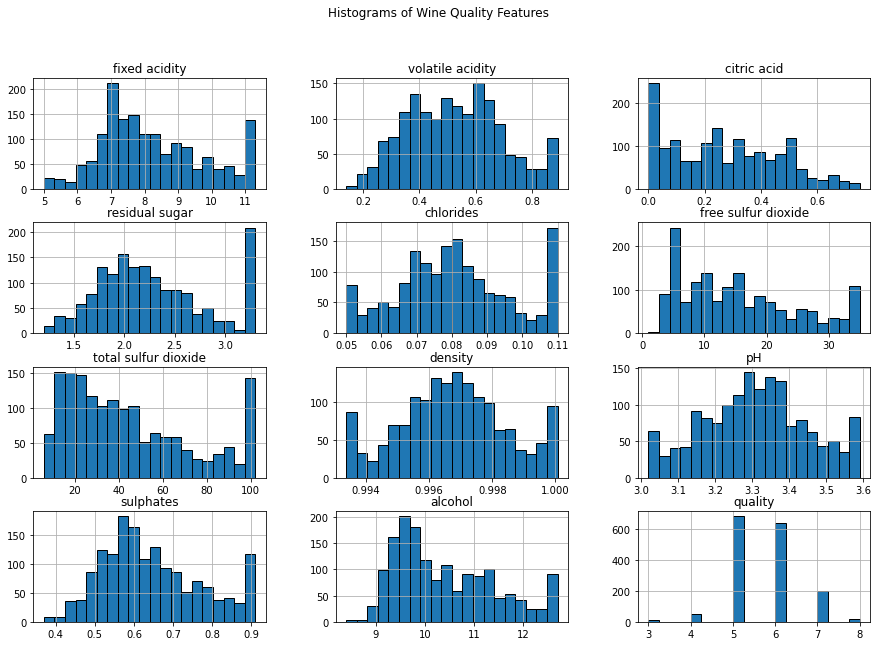

In [7]:
# Histograms
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Wine Quality Features')
plt.show()

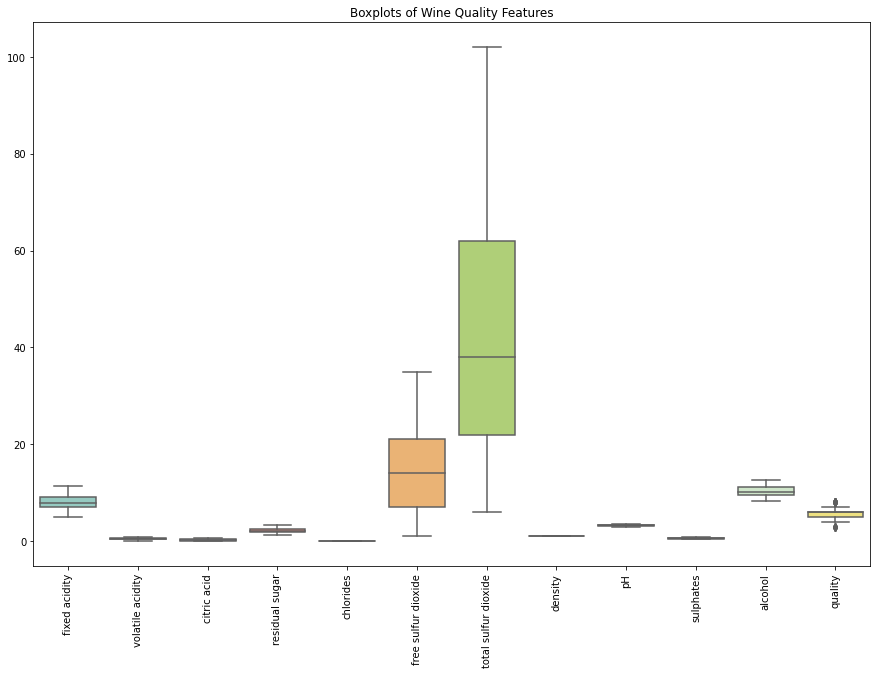

In [8]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Boxplots of Wine Quality Features')
plt.show()

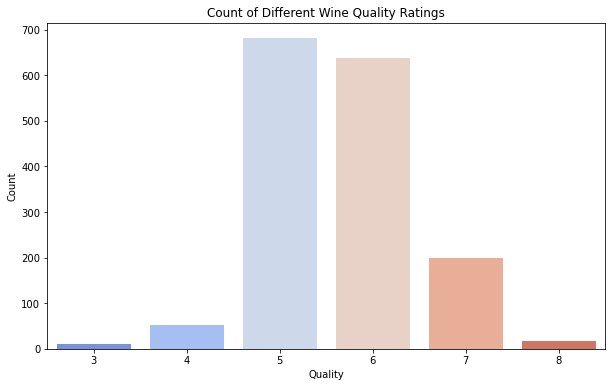

In [9]:
# Bar Plot of Quality Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='coolwarm')
plt.title('Count of Different Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

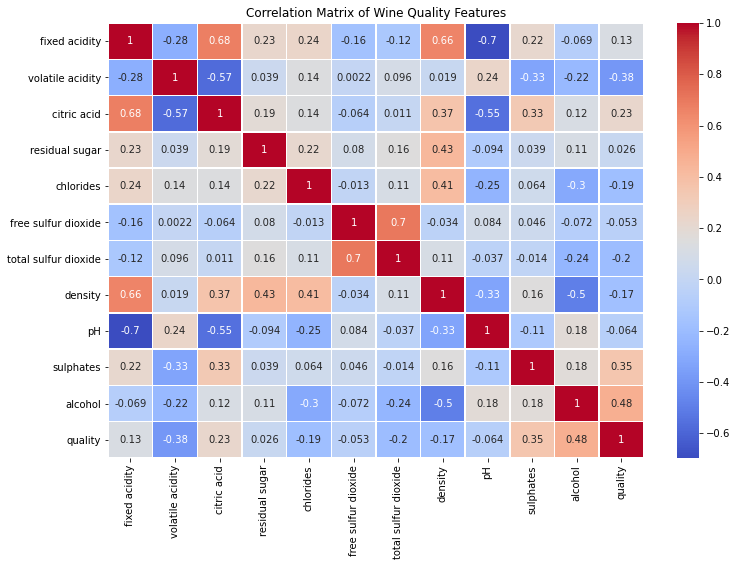

In [10]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wine Quality Features')
plt.show()

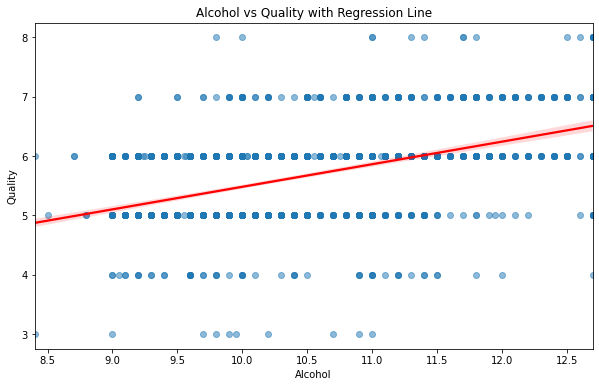

In [11]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Alcohol vs Quality with Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()